In [3]:
#test the effects of acceptance on broadening
import numpy as np, matplotlib.pyplot as plt, random

In [4]:
r=random.Random()

-6.613149854395317e-07 0.026571811623272133


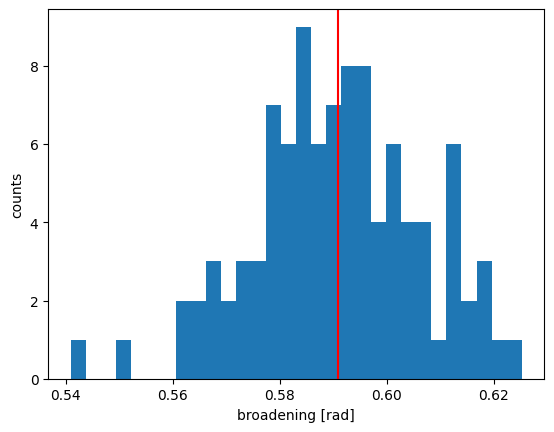

In [44]:
bins=8

sigmaD=1.1
sigmaA=1.3
phi=np.linspace(np.pi/(2*bins), (2*bins-1)*np.pi/(2*bins), bins)
yD=np.exp(-(phi-np.pi)**2/(2*sigmaD**2))
yA=np.exp(-(phi-np.pi)**2/(2*sigmaA**2))

syst_effD=0.09 #systematic on the efficiency for D
syst_diff_eff=0.02 #systematic for the difference in efficiency between D and A

broadenings=[]

def broadening(yDm,yAm):
    b2=sum(yAm*(np.pi-phi)**2)/sum(yAm)-sum(yDm*(np.pi-phi)**2)/sum(yDm)
    
    return np.sqrt(abs(b2))*np.sign(b2)

for i in range(100):
    effD=[]
    effA=[]
    for j in range(bins):
        effD.append(r.gauss(1,syst_effD))
        effA.append(r.gauss(effD[-1], syst_diff_eff))
        #print(yD*effD,yA*effA)
    b=broadening(yD*effD,yA*effA)
    broadenings.append(b)
plt.hist(broadenings, bins=30)
plt.axvline(broadening(yD,yA), color='red')
print(np.mean(broadenings)-broadening(yD,yA), np.std(broadenings)/np.mean(broadenings))
plt.xlabel("broadening [rad]")
plt.ylabel("counts")
plt.show()

Help on method gauss in module random:

gauss(mu, sigma) method of random.Random instance
    Gaussian distribution.
    
    mu is the mean, and sigma is the standard deviation.  This is
    slightly faster than the normalvariate() function.
    
    Not thread-safe without a lock around calls.

